In [67]:
import pandas as pd
import requests
from io import StringIO

In [68]:
url ='https://docs.google.com/spreadsheets/d/1iYHApNr4LjZWybk2O5tKI4NgxQX_0mG0j-KXId2r47A/export?format=csv&gid=0'
df = pd.read_csv(url)

In [69]:
df

,Name,Surname,Subjects (max 3 items),City,Country,Can help with (max 3 items)
0,Francesco,Turci,"disordered systems, soft matter, computational...",Bristol,UK,"editing, IT support, graphics"
1,Gianni,Petrella,"Mathematics, Physics, CS",Brussels,BE,"IT support and maintenance, AI, statistics"
2,Emanuele,Penocchio,"Physical Chemistry, Thermodynamics",Luxembourg,LU,"Festivaletteratura, organization, discussion o..."
3,Fulvio,Paleari,"Condensed matter, solid state, computational p...",Roma,IT,"editing, content discussion and production"
4,Riccardo,Impavido,"Physics, mathematics, philosophy",Padova,IT,"Writing, workshops"
5,Lavinia,Marziale,"mathematics, CS, linguistics",Montpellier,FR,"IT support, artistic experiments"
6,Maria Elena,Antinori,"biotechnology, microorganisms",Genova,IT,"workshops, interviews"
7,Elena Alma,Rastello,"book publishing, literature, linguistics",Torino,IT,"communication, discussion of contents"
8,Sara,Dal Cengio,"physics, chemistry",Barcelona,ES,"radio and podcasts, interviews"
9,Danilo,Forastiere,"Physical Chemistry, Thermodynamics",Luxembourg,LU,IT support and maintenance


In [70]:
subj = df['Subjects (max 3 items)']
all_subjs = [s.split(',') for s in subj]
all_subjs = [s.strip() for l in all_subjs for s in l]
all_subjs = " ".join([s.replace(' ', '_').lower() for s in all_subjs])

In [71]:
all_subjs

'disordered_systems soft_matter computational_physics mathematics physics cs physical_chemistry thermodynamics condensed_matter solid_state computational_physics physics mathematics philosophy mathematics cs linguistics biotechnology microorganisms book_publishing literature linguistics physics chemistry physical_chemistry thermodynamics scientific_communication literature linguistics mathematics philosophy graphics visual_arts thermodynamics disordered_systems'

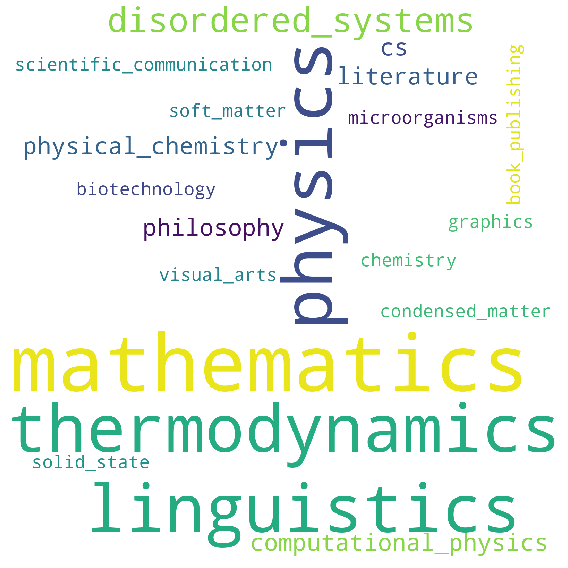

In [73]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_subjs) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
